In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter

### GloVe

In [2]:
df = pd.read_csv("cleaned_data/cleaned_reviews_3.csv")
df["text"] = df["text"].apply(lambda x: ast.literal_eval(x))
df["detoken"] = df["text"].apply(lambda y: TreebankWordDetokenizer().tokenize(y))
df.head()

,review,text,rating,sentiment,detoken
0,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0,start out strong but go downhill fairly quickl...
1,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0,decently write ya book but can even consider e...
2,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0,ugh try honestly try huge fan scott westerfeld...
3,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0,main point never ever introduce point view sid...
4,Why do all YA books have to have a love triang...,"[all, ya, book, love, triangle, now, just, who...",1,0,all ya book love triangle now just whole world...


In [4]:
(df["rating"] == 0).count()

11400

In [3]:
all_words = [word for text in df["text"] for word in text]
vocab = list(set(all_words))

print(f"There are {len(all_words)} in total and the vocab size is {len(vocab)}.")

There are 1036091 in total and the vocab size is 27338.


In [4]:
embeddings_dict = {}
with open("glove.42B.300d.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

In [8]:
def vocab_build(review_set):

    vocab = Counter()

    for review in review_set:
        for token in review:
            vocab[token] += 1

    return vocab

def embedding_coverage(review_set, embeddings_dict):
    
    vocab = vocab_build(review_set)

    covered = {}
    word_count = {}
    oov = {}
    covered_num = 0
    oov_num = 0

    for word in vocab:
        try:
            covered[word] = embeddings_dict[word]
            covered_num += vocab[word]
            word_count[word] = vocab[word]
        
        except:
            oov[word] = vocab[word]
            oov_num += oov[word]

    vocab_coverage = len(covered) / len(vocab) * 100
    text_coverage = covered_num / (covered_num + oov_num) * 100
    
    return word_count, oov, vocab_coverage, text_coverage

####

all_covered, all_oov, vocab_coverage, text_coverage = embedding_coverage(df["text"], embeddings_dict)

print(f"Glove embeddings cover {round(vocab_coverage, 2)}% of vocabulary and {round(text_coverage, 2)}% of all text.")

Glove embeddings cover 92.56% of vocabulary and 99.71% of all text.


### Activation Function

In [6]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
relu = lambda x: max(0, x)
tanh = lambda x: np.tanh(x)

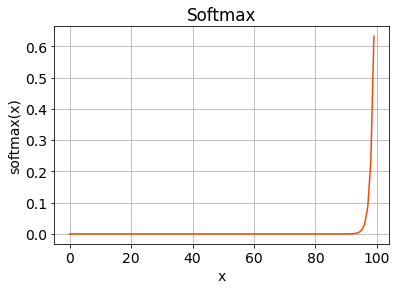

In [19]:
x = np.arange(0, 100, 1)
y = np.exp(x) / np.sum(np.exp(x))

plt.rcParams["font.size"] = 14
plt.plot(x, y, "orangered")
plt.xlabel("x")
plt.ylabel("softmax(x)")
plt.title("Softmax")
plt.grid(True)
plt.savefig("Softmax.png", bbox_inches="tight")


In [3]:
df = pd.read_csv("cleaned_data/cleaned_reviews_4.csv")
with pd.option_context("display.max_rows", 8, "display.max_colwidth", 100, "display.colheader_justify", "left"):
    display(df)

,review,text,rating,sentiment
0,"This started out strong, but it went downhill fairly quickly. It's not like there weren't good t...","['start', 'out', 'strong', 'go', 'downhill', 'fairly', 'quickly', 'not', 'like', 'there', 'weren...",1,0
1,"A decently written YA book, but I can't even consider the ending to be one. More like its missin...","['decently', 'write', 'ya', 'book', 'can', 'even', 'consider', 'end', 'one', 'more', 'like', 'mi...",1,0
2,"Ugh...I tried, I honestly tried. I'm a huge fan of Scott Westerfeld...the Uglies series is among...","['ugh', 'try', 'honestly', 'try', 'huge', 'fan', 'scott', 'westerfeld', 'uglies', 'series', 'amo...",1,0
3,I hate to give any book this low of a rating - I know what it takes to actually finish a manuscr...,"['hate', 'give', 'any', 'book', 'low', 'rat', 'know', 'take', 'actually', 'finish', 'manuscript'...",1,0
...,...,...,...,...
13996,This was an awesome sequel to Moving in Neutral. I cannot wait for the third book as this one le...,"['awesome', 'sequel', 'move', 'neutral', 'can', 'not', 'wait', 'third', 'book', 'one', 'leave', ...",5,1
13997,I don't know where to begin except I didn't want this book to end. It's so beautiful I could jus...,"['don', 'know', 'begin', 'except', 'didn', 'want', 'book', 'end', 'beautiful', 'could', 'just', ...",5,1
13998,"an amazing read - surprising, original and really takes you by storm. \n Ruby was annoying at fi...","['amaze', 'read', 'surprise', 'original', 'really', 'take', 'storm', 'ruby', 'annoy', 'first', '...",5,1
13999,Easy summertime read that I flew through. likeable characters with enough going on to keep your ...,"['easy', 'summertime', 'read', 'fly', 'through', 'likeable', 'character', 'with', 'enough', 'go'...",5,1
